In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-77.75923561907722, -24.55421634297724), (-34.046204760773875, 74.68655896955096), (54.65474771075742, -122.02860099937378), (47.14580110739354, -144.22037091997868), (-14.222939156989284, 125.05542163884382), (-32.602500516712865, -124.0561825286619), (57.842331502157094, -3.2806859979070566), (50.5815351295127, -61.06026512331803), (-23.874622097570466, 86.59391874630268), (-50.90407459067878, 112.65741987326652), (-1.4835365170015677, -155.75618177935877), (66.13661125235186, 95.92589001989501), (50.53670531110555, -8.422304149745742), (7.327835148504036, 137.11108549870124), (33.72675749565069, -176.9528311469133), (54.320172429318546, 90.81392633466174), (-6.919829056905556, -42.9869579263233), (-9.102338878105499, -17.376396135966047), (51.81600386252694, 4.234734664464469), (56.336327983647664, -87.2430749597255), (-77.40037109826113, -104.98243291585496), (-59.040572968803495, 96.85614476461166), (12.65753310878874, -78.24536424279889), (19.61333435545481, -107.86541887030238

In [5]:
#Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [12]:
# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call. define your metric units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | prince george
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | kununurra
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | lossiemouth
Processing Record 8 of Set 1 | saint-augustin
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | baykit
Processing Record 13 of Set 1 | clonakilty
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | bograd
Processing Record 17 of Set 1 | floriano
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | spijkenisse
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | busselton


Processing Record 38 of Set 4 | samarai
Processing Record 39 of Set 4 | barcelona
Processing Record 40 of Set 4 | umm lajj
Processing Record 41 of Set 4 | westpunt
City not found. Skipping...
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | bacarra
Processing Record 46 of Set 4 | berdigestyakh
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | itoman
Processing Record 49 of Set 4 | maltahohe
Processing Record 50 of Set 4 | geraldton
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | elat
Processing Record 3 of Set 5 | mollendo
Processing Record 4 of Set 5 | galgani
City not found. Skipping...
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | dashitou
Processing Record 8 of Set 5 | sumbe
Processing Record 9 of Set 5 | ishigaki
Processing Record 10 of Set 5 | khvorostyanka
P

Processing Record 27 of Set 8 | felanitx
Processing Record 28 of Set 8 | zaraza
Processing Record 29 of Set 8 | lorengau
Processing Record 30 of Set 8 | ananas
Processing Record 31 of Set 8 | belaya
Processing Record 32 of Set 8 | panguna
Processing Record 33 of Set 8 | omsukchan
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | batagay
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 38 of Set 8 | tidore
City not found. Skipping...
Processing Record 39 of Set 8 | tommot
Processing Record 40 of Set 8 | north bend
Processing Record 41 of Set 8 | port macquarie
Processing Record 42 of Set 8 | belle fourche
Processing Record 43 of Set 8 | jalu
Processing Record 44 of Set 8 | san rafael
Processing Record 45 of Set 8 | amderma
City not found. Skipping...
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | kuche
City not found. Skipping...
Processing Record 48 of Set 8 | na

Processing Record 16 of Set 12 | zhangye
Processing Record 17 of Set 12 | saint pete beach
Processing Record 18 of Set 12 | sorvag
City not found. Skipping...
Processing Record 19 of Set 12 | celestun
Processing Record 20 of Set 12 | buncrana
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | grand-santi
Processing Record 23 of Set 12 | kenai
Processing Record 24 of Set 12 | luanda
Processing Record 25 of Set 12 | le havre
Processing Record 26 of Set 12 | anloga
Processing Record 27 of Set 12 | araguari
Processing Record 28 of Set 12 | rio gallegos
Processing Record 29 of Set 12 | tutoia
Processing Record 30 of Set 12 | murray bridge
Processing Record 31 of Set 12 | blonduos
City not found. Skipping...
Processing Record 32 of Set 12 | douentza
Processing Record 33 of Set 12 | clyde river
Processing Record 34 of Set 12 | milagres
Processing Record 35 of Set 12 | tan an
Processing Record 36 of Set 12 | benguela
Processing Record 37 of Set 12 | floro
Processing Recor

In [15]:
len(city_data)

556

In [16]:
city_data

[{'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 37.06,
  'Humidity': 81,
  'Cloudiness': 0,
  'Wind Speed': 6.91,
  'Country': 'AR',
  'Date': '2022-05-22 02:41:35'},
 {'City': 'Bambous Virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Max Temp': 70.05,
  'Humidity': 83,
  'Cloudiness': 40,
  'Wind Speed': 16.11,
  'Country': 'MU',
  'Date': '2022-05-22 02:41:35'},
 {'City': 'Prince George',
  'Lat': 53.9166,
  'Lng': -122.753,
  'Max Temp': 62.04,
  'Humidity': 25,
  'Cloudiness': 0,
  'Wind Speed': 2.3,
  'Country': 'CA',
  'Date': '2022-05-22 02:40:15'},
 {'City': 'Sitka',
  'Lat': 57.0531,
  'Lng': -135.33,
  'Max Temp': 58.89,
  'Humidity': 44,
  'Cloudiness': 0,
  'Wind Speed': 3.44,
  'Country': 'US',
  'Date': '2022-05-22 02:41:30'},
 {'City': 'Kununurra',
  'Lat': -15.7667,
  'Lng': 128.7333,
  'Max Temp': 85.98,
  'Humidity': 28,
  'Cloudiness': 7,
  'Wind Speed': 10.36,
  'Country': 'AU',
  'Date': '2022-05-22 02:41:36'},
 {'City': 'Rikitea',
  'Lat': -23.

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.06,81,0,6.91,AR,2022-05-22 02:41:35
1,Bambous Virieux,-20.3428,57.7575,70.05,83,40,16.11,MU,2022-05-22 02:41:35
2,Prince George,53.9166,-122.7530,62.04,25,0,2.30,CA,2022-05-22 02:40:15
3,Sitka,57.0531,-135.3300,58.89,44,0,3.44,US,2022-05-22 02:41:30
4,Kununurra,-15.7667,128.7333,85.98,28,7,10.36,AU,2022-05-22 02:41:36
5,Rikitea,-23.1203,-134.9692,75.76,75,3,13.06,PF,2022-05-22 02:41:36
6,Lossiemouth,57.7214,-3.2834,56.16,78,0,5.75,GB,2022-05-22 02:41:36
7,Saint-Augustin,51.2260,-58.6502,46.00,88,100,16.75,CA,2022-05-22 02:41:37
8,Bengkulu,-3.8004,102.2655,83.64,66,33,2.80,ID,2022-05-22 02:41:37
9,Albany,42.6001,-73.9662,76.53,84,48,2.95,US,2022-05-22 02:41:38


In [18]:
reorder_city_data_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_city_data_df]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-22 02:41:35,-54.8000,-68.3000,37.06,81,0,6.91
1,Bambous Virieux,MU,2022-05-22 02:41:35,-20.3428,57.7575,70.05,83,40,16.11
2,Prince George,CA,2022-05-22 02:40:15,53.9166,-122.7530,62.04,25,0,2.30
3,Sitka,US,2022-05-22 02:41:30,57.0531,-135.3300,58.89,44,0,3.44
4,Kununurra,AU,2022-05-22 02:41:36,-15.7667,128.7333,85.98,28,7,10.36
5,Rikitea,PF,2022-05-22 02:41:36,-23.1203,-134.9692,75.76,75,3,13.06
6,Lossiemouth,GB,2022-05-22 02:41:36,57.7214,-3.2834,56.16,78,0,5.75
7,Saint-Augustin,CA,2022-05-22 02:41:37,51.2260,-58.6502,46.00,88,100,16.75
8,Bengkulu,ID,2022-05-22 02:41:37,-3.8004,102.2655,83.64,66,33,2.80
9,Albany,US,2022-05-22 02:41:38,42.6001,-73.9662,76.53,84,48,2.95


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

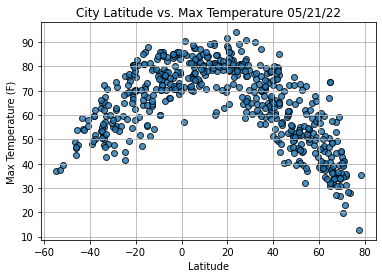

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

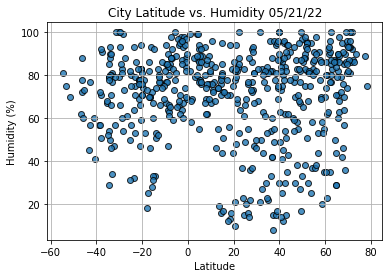

In [22]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

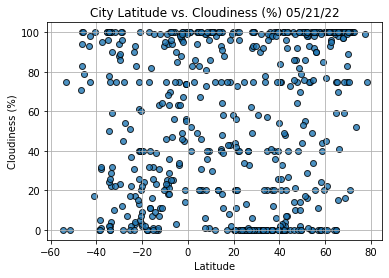

In [23]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

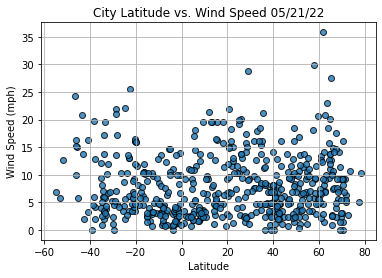

In [24]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
#Testing the loc method to pull a road.
index13 = city_data_df.loc[13]
index13

City                        Airai
Country                        TL
Date          2022-05-22 02:41:39
Lat                       -8.9266
Lng                      125.4092
Max Temp                    74.32
Humidity                       47
Cloudiness                     23
Wind Speed                   4.59
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Prince George,CA,2022-05-22 02:40:15,53.9166,-122.7530,62.04,25,0,2.30
3,Sitka,US,2022-05-22 02:41:30,57.0531,-135.3300,58.89,44,0,3.44
6,Lossiemouth,GB,2022-05-22 02:41:36,57.7214,-3.2834,56.16,78,0,5.75
7,Saint-Augustin,CA,2022-05-22 02:41:37,51.2260,-58.6502,46.00,88,100,16.75
9,Albany,US,2022-05-22 02:41:38,42.6001,-73.9662,76.53,84,48,2.95


## Create A Function for Plotting Regression

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

##  Create dataframes for northern and southern hemisphers

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Create values for Max Temp

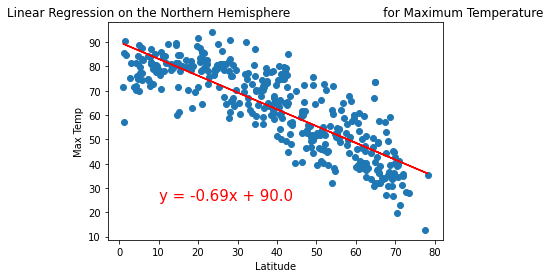

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,25))




In [41]:
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)    

(-0.6906732943362479,
 90.00359856226207,
 -0.8291101402730912,
 1.8955325030234704e-94,
 0.02434433803177804)

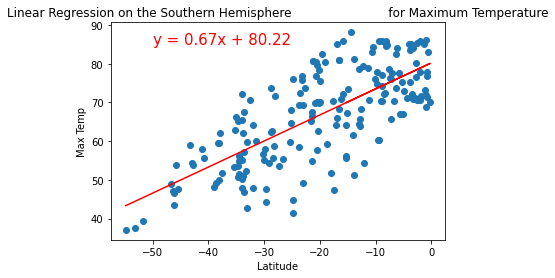

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

In [43]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)    

(0.673229202467953,
 80.21781359549149,
 0.7300699923563048,
 1.4044759155722643e-32,
 0.046206108741434306)

## Create values for Humidity

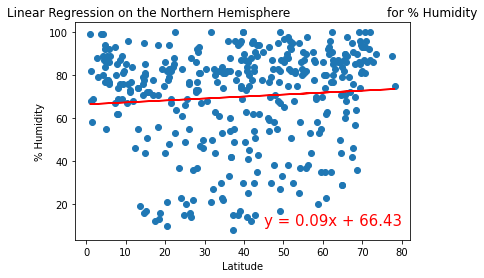

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

In [57]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)  

(0.09119259466297674,
 66.43220632918487,
 0.08062350162648833,
 0.12261754895970296,
 0.05893065615318494)

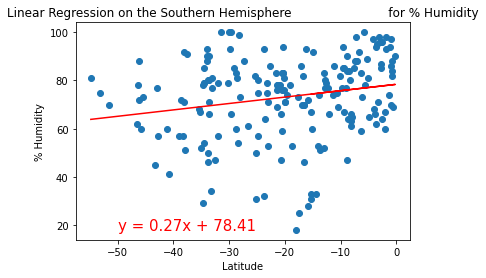

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,18))

In [55]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)  

(0.26548950248759645,
 78.4077677823111,
 0.20710404150502246,
 0.004348431780777335,
 0.09195656958933707)

## Create values for Cloudiness

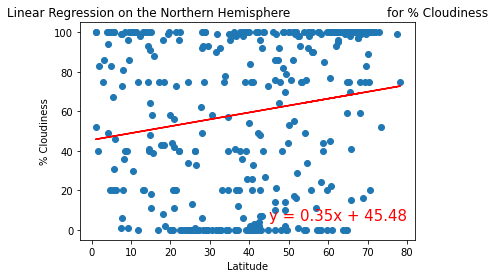

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,5))

In [66]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)  

(0.3484388192367001,
 45.483853748582874,
 0.17760608346053416,
 0.0006199453548186478,
 0.10091787987208556)

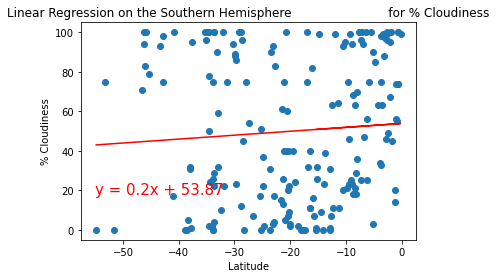

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,18))

In [69]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)  

(0.19809041854209924,
 53.866461766897075,
 0.07173600534617348,
 0.32792813010821664,
 0.20195261066493575)

## Create values for Wind Speed

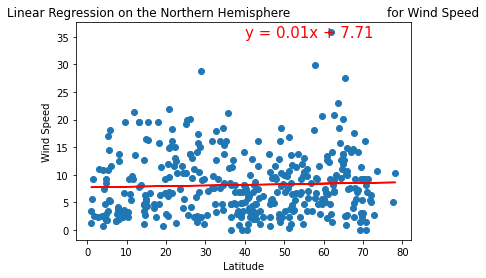

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [71]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)  

(0.01150125410637714,
 7.7072442198568485,
 0.04168447234962631,
 0.42529251646454924,
 0.014409625883451661)

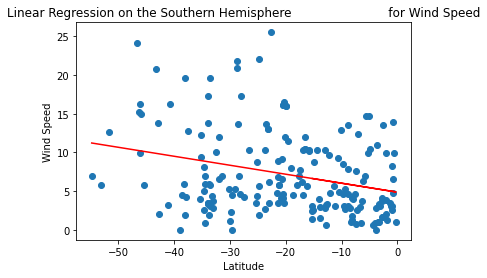

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [73]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)  

(-0.11579906335853357,
 4.874579396537607,
 -0.28572418389165505,
 7.046670562386454e-05,
 0.028477932286758236)